In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
import datetime
from datetime import datetime

In [3]:
data = yf.download('GBPUSD=X', start='2010-01-01', end='2024-12-10') # download the data

[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GBPUSD=X,GBPUSD=X,GBPUSD=X,GBPUSD=X,GBPUSD=X,GBPUSD=X
Date,,,,,,
2010-01-01,1.613294,1.613294,1.618202,1.613111,1.618202,0
2010-01-04,1.611370,1.611370,1.623904,1.606503,1.613710,0
2010-01-05,1.599079,1.599079,1.615587,1.597010,1.611863,0
2010-01-06,1.602384,1.602384,1.606323,1.594388,1.599360,0
2010-01-07,1.593397,1.593397,1.605858,1.590078,1.602205,0


In [5]:
data.shape

(3892, 6)

In [6]:
data.isnull().sum()

Price      Ticker  
Adj Close  GBPUSD=X    0
Close      GBPUSD=X    0
High       GBPUSD=X    0
Low        GBPUSD=X    0
Open       GBPUSD=X    0
Volume     GBPUSD=X    0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
#ploting 

In [9]:
data.columns

MultiIndex([('Adj Close', 'GBPUSD=X'),
            (    'Close', 'GBPUSD=X'),
            (     'High', 'GBPUSD=X'),
            (      'Low', 'GBPUSD=X'),
            (     'Open', 'GBPUSD=X'),
            (   'Volume', 'GBPUSD=X')],
           names=['Price', 'Ticker'])

In [10]:
rollmean=data['Open'].rolling(50).mean() # the moving average

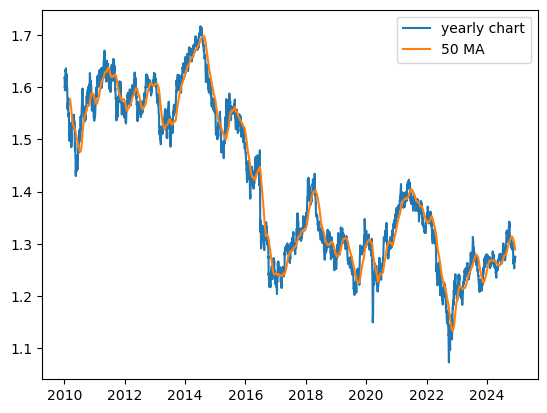

In [11]:
plt.plot(data['Open'],label='yearly chart')
plt.plot(rollmean,label='50 MA')
plt.legend()

In [12]:
data.dtypes

Price      Ticker  
Adj Close  GBPUSD=X    float64
Close      GBPUSD=X    float64
High       GBPUSD=X    float64
Low        GBPUSD=X    float64
Open       GBPUSD=X    float64
Volume     GBPUSD=X      int64
dtype: object

In [13]:
open_price=data[['Open']]

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [15]:
scaler=MinMaxScaler(feature_range=(0,1))

In [16]:
scaler_data=scaler.fit_transform(open_price)

In [17]:
# feature sequence
x=[]
y=[]
for i in range(60,len(scaler_data)):
    x.append(scaler_data[i-60:i])
    y.append(scaler_data[i])

x=np.array(x)
y=np.array(y)

In [18]:
x.shape,y.shape

((3832, 60, 1), (3832, 1))

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [20]:
x_train.shape

(2682, 60, 1)

In [21]:
# model builing

In [22]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

In [23]:
model=Sequential()

In [24]:
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dropout(0.3))

In [25]:
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.3))

In [26]:
model.add(LSTM(units=50,return_sequences=False))
model.add(Dropout(0.3))

In [27]:
model.add(Dense(units=1))

In [28]:
# compile
model.compile(optimizer='adam',loss='mean_absolute_error')

In [29]:
# fit the model
lstm_model=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32,epochs=10)

Epoch 1/10
84/84 [==============================] - 43s 255ms/step - loss: 0.0964 - val_loss: 0.0547
Epoch 2/10
84/84 [==============================] - 17s 203ms/step - loss: 0.0567 - val_loss: 0.0517
Epoch 3/10
84/84 [==============================] - 17s 200ms/step - loss: 0.0531 - val_loss: 0.0230
Epoch 4/10
84/84 [==============================] - 17s 200ms/step - loss: 0.0553 - val_loss: 0.0238
Epoch 5/10
84/84 [==============================] - 17s 200ms/step - loss: 0.0490 - val_loss: 0.0352
Epoch 6/10
84/84 [==============================] - 17s 206ms/step - loss: 0.0476 - val_loss: 0.0225
Epoch 7/10
84/84 [==============================] - 17s 208ms/step - loss: 0.0485 - val_loss: 0.0219
Epoch 8/10
84/84 [==============================] - 17s 206ms/step - loss: 0.0427 - val_loss: 0.0205
Epoch 9/10
84/84 [==============================] - 17s 208ms/step - loss: 0.0412 - val_loss: 0.0219
Epoch 10/10
84/84 [==============================] - 18s 214ms/step - loss: 0.0391 - val_lo

In [30]:
# plotting the loss
loss=lstm_model.history['loss']
val=lstm_model.history['val_loss']

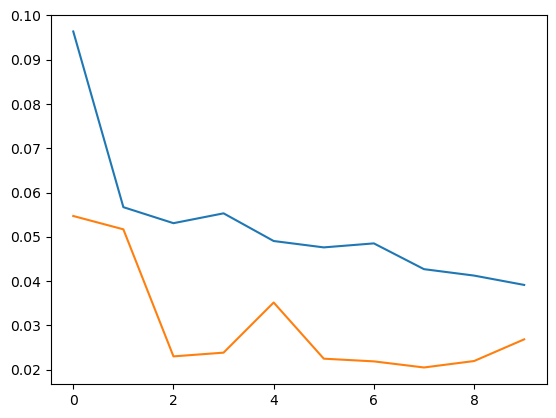

In [31]:
plt.plot(loss,label='loss')
plt.plot(val,label='validation loss')

In [32]:
# predictions

In [33]:
prediction=model.predict(x_test)

36/36 [==============================] - 6s 59ms/step


In [34]:
inv_pred=scaler.inverse_transform(prediction)

In [35]:
inv_y_test=scaler.inverse_transform(y_test)

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
rmse=np.sqrt(mean_squared_error(inv_y_test,inv_pred))
rmse # error difference

0.021592419613881034

In [38]:
pred_df=pd.DataFrame({'actual':inv_y_test.reshape(-1),
                     'predicted':inv_pred.reshape(-1)})
#comapring the actual vs predicted values

In [39]:
pred_df # predicted vs actual values

,actual,predicted
0,1.317870,1.302143
1,1.609891,1.586862
2,1.258384,1.257530
3,1.272265,1.257635
4,1.219363,1.199725
...,...,...
1145,1.687707,1.652089
1146,1.548995,1.507294
1147,1.651419,1.612144
1148,1.568898,1.550336


In [40]:
from statsmodels.tsa .api import SimpleExpSmoothing

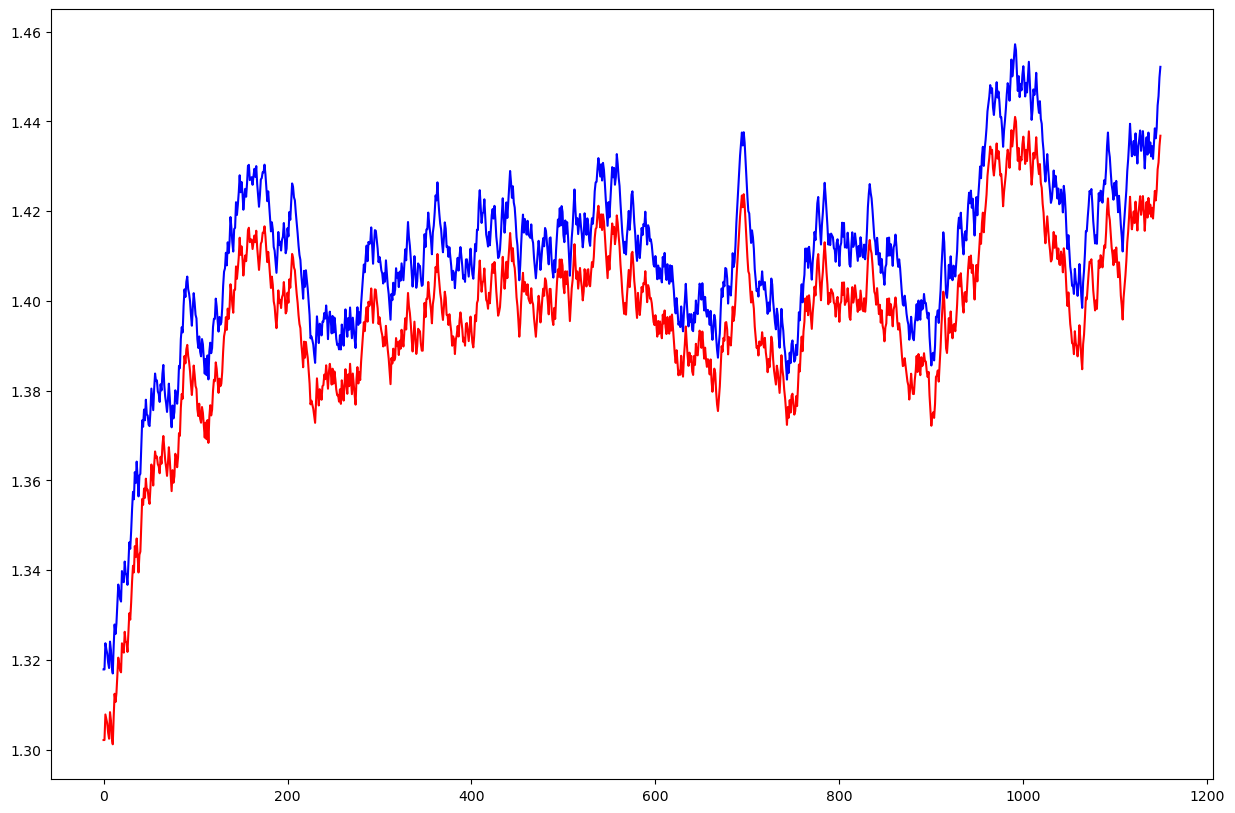

In [41]:
plt.figure(figsize=(15,10))
fit1=SimpleExpSmoothing(inv_pred).fit(smoothing_level=0.02,optimized=False)
plt.plot(fit1.fittedvalues,color='red')
fit2=SimpleExpSmoothing(inv_y_test).fit(smoothing_level=0.02,optimized=False)
plt.plot(fit2.fittedvalues,color='blue')
# visualizing the predicted vs actual

# forecast

In [42]:
forecast_date = pd.date_range(start='2024-12-08', periods=30, freq='D').tolist()

In [43]:
fore_date=[]
for time_i in forecast_date:
    fore_date.append(time_i.date())


In [44]:
n_future=30

In [45]:
fore_df=model.predict(x_train[-n_future:])

1/1 [==============================] - 0s 160ms/step


In [46]:
future_pred=scaler.inverse_transform(fore_df)

In [47]:
f_df=pd.DataFrame({'dates':np.array(fore_date),
                   'open':future_pred.flatten()})

In [50]:
f_df

,dates,open
0,2024-12-08,1.586125
1,2024-12-09,1.552597
2,2024-12-10,1.239248
3,2024-12-11,1.384408
4,2024-12-12,1.268678
5,2024-12-13,1.440844
6,2024-12-14,1.261807
7,2024-12-15,1.498134
8,2024-12-16,1.195087
9,2024-12-17,1.317401


In [51]:
original=data['Open']
original_df = original.loc[original.index > '2024-09-01']

In [52]:
roll_f=f_df['open'].rolling(50).mean()

In [56]:
# model saving
model.save('gbpusd stock model.keras')

In [57]:
last_days=scaler_data[-60:]
last_days=last_days.reshape(1,60,1)

In [58]:
future_prediction=[]
for _ in range(60):
    nxt_pred=model.predict(last_days)
    future_prediction.append(nxt_pred[0,0])
    last_days=np.roll(last_days,-1,axis=1)
future_prediction=scaler.inverse_transform(np.array(future_prediction).reshape(-1,1))
# wether scaled values or x_test,it still the same thing

1/1 [==============================] - 0s 97ms/step


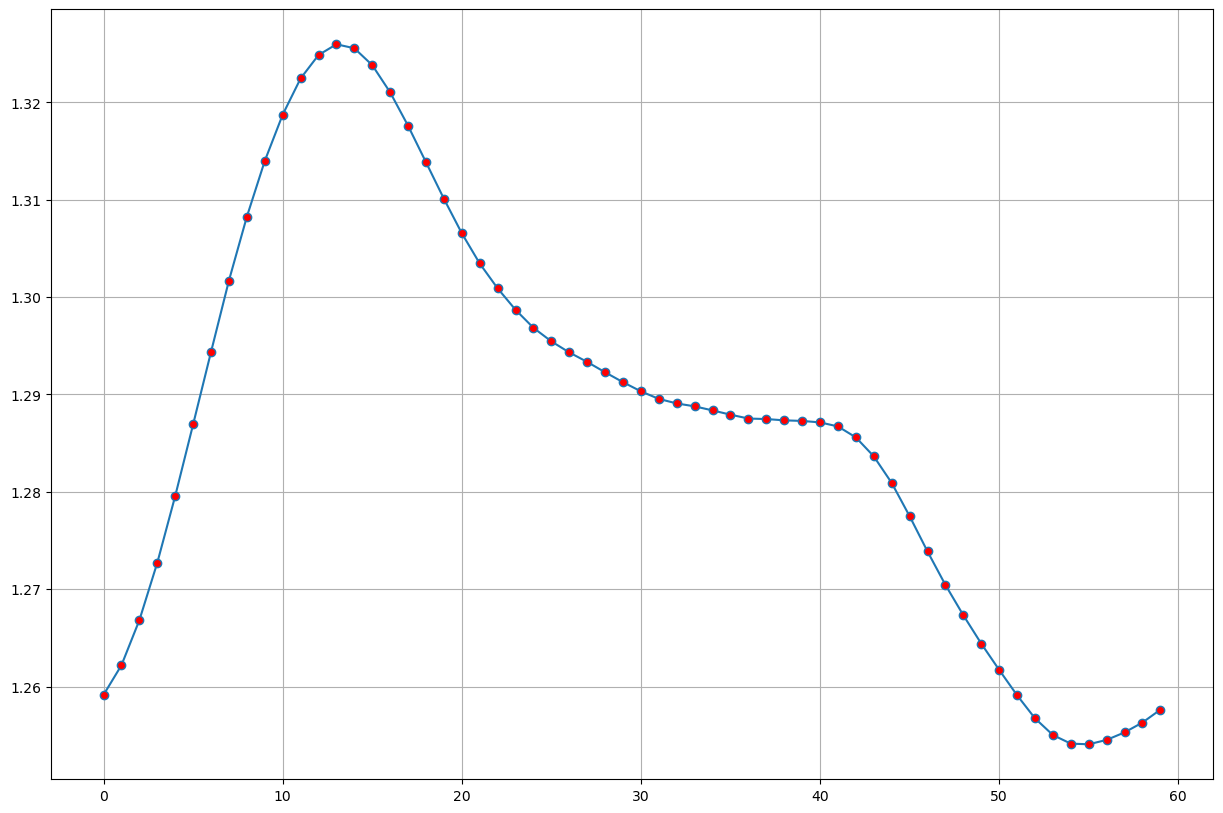

In [59]:
plt.figure(figsize=(15,10))
plt.plot(future_prediction,marker='o',markerfacecolor='red')
plt.grid(True)